In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.2.0


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
tf.config.experimental.set_memory_growth(device=gpus[1], enable=True)

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1)

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                              padding='same',
                              activation='relu',
                              input_shape=(28, 28, 1)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3,
                              padding='same',
                              activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [6]:
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]

In [7]:
train_datagen = keras.preprocessing.image.ImageDataGenerator()
train_generator = train_datagen.flow(x_train_scaled, y_train, 500)

valid_datagen = keras.preprocessing.image.ImageDataGenerator()
valid_generator = valid_datagen.flow(x_valid_scaled, y_valid, 500)

history = model.fit(train_generator, epochs=10, validation_data = valid_generator, callbacks = callbacks)

Epoch 1/10
110/110 [==============================] - 4s 35ms/step - loss: 2.2718 - accuracy: 0.2198 - val_loss: 2.2123 - val_accuracy: 0.3466
Epoch 2/10
110/110 [==============================] - 4s 33ms/step - loss: 1.6561 - accuracy: 0.4849 - val_loss: 0.9729 - val_accuracy: 0.6590
Epoch 3/10
110/110 [==============================] - 4s 33ms/step - loss: 0.8741 - accuracy: 0.6814 - val_loss: 0.7309 - val_accuracy: 0.7306
Epoch 4/10
110/110 [==============================] - 4s 33ms/step - loss: 0.7138 - accuracy: 0.7364 - val_loss: 0.7115 - val_accuracy: 0.7408
Epoch 5/10
110/110 [==============================] - 4s 33ms/step - loss: 0.6406 - accuracy: 0.7613 - val_loss: 0.5837 - val_accuracy: 0.7842
Epoch 6/10
110/110 [==============================] - 4s 34ms/step - loss: 0.5903 - accuracy: 0.7796 - val_loss: 0.5396 - val_accuracy: 0.7990
Epoch 7/10
110/110 [==============================] - 4s 34ms/step - loss: 0.5510 - accuracy: 0.7968 - val_loss: 0.5279 - val_accuracy: 0.8096

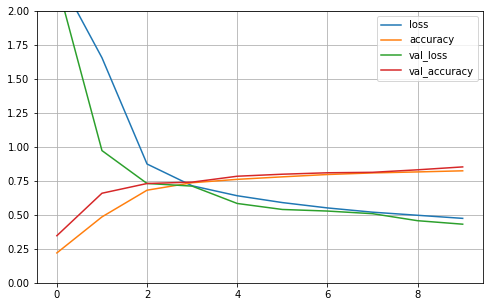

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()

plot_learning_curves(history)

In [13]:
test_datagen = keras.preprocessing.image.ImageDataGenerator()
test_generator = test_datagen.flow(x_test_scaled, y_test, 500)

In [14]:
model.evaluate(test_generator)

20/20 [==============================] - 0s 13ms/step - loss: 0.4714 - accuracy: 0.8274


[0.4714069962501526, 0.8274000287055969]

In [15]:
!nvidia-smi

Mon Jul  6 14:09:30 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.126.02   Driver Version: 418.126.02   CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:3B:00.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |     10MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:AF:00.0 Off |                    0 |
| N/A   63C    P0    32W /  70W |   2681MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        